### Samikshhya Gurung (2417750)

# Problem - 1: Getting Started with Data Exploration

## 1. Data Exploration and Understanding

### • Dataset Overview:
 1. Load the dataset and display the first 10 rows.
 2. Identify the number of rows and columns in the dataset.
 3. List all the columns and their data types

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1
try:
  data = pd.read_csv('/content/drive/MyDrive/Dataset/WHR-2024-5CS037.csv')
  print("Dataset loaded successfully!")
except FileNotFoundError:
  print("Error: '/content/drive/MyDrive/AI_files/WHR-2024-5CS037.csv' not found. ")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

# displaying the first 10 rows
print("First 10 rows of the dataset:")
print(data.head(10))

# 2
print("\nNumber of rows and columns:", data.shape)

# 3
print("\nColumns and their data types:")
print(data.dtypes)




Dataset loaded successfully!
First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.

### • Basic Statistics:
 1. Calculate the mean, median, and standard deviation for the Score column.
 2. Identify the country with the highest and lowest happiness scores

In [27]:
# 1
score_mean = data["score"].mean()
score_median = data["score"].median()
score_std = data["score"].std()
print(f"\nScore - Mean: {score_mean}, Median: {score_median}, Standard Deviation: {score_std}")

# 2
highest_score_country = data.loc[data["score"].idxmax(), "Country name"]
lowest_score_country = data.loc[data["score"].idxmin(), "Country name"]

print(f"\nCountry name with the highest score: {highest_score_country}")
print(f"Country name with the lowest score: {lowest_score_country}")


Score - Mean: 5.52758041958042, Median: 5.785, Standard Deviation: 1.1707165099442995

Country name with the highest score: Finland
Country name with the lowest score: Afghanistan


### • Missing Values:
 1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [28]:
missing_values = data.isnull().sum()

print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


### • Filtering and Sorting:
 1. Filter the dataset to show only the countries with a Score greater than 7.5.
 2. For the filtered dataset- Sort the dataset by GDP per Capita in descending order and display the
 top 10 rows

In [29]:
# 1
filtered_data = data[data["score"] > 7.5]

#2
sorted_data = data[data["score"] > 7.5]
#displaying the top 10 rows
print("\nTop 10 countries with Score > 7.5, sorted by GDP per Capita:")
print(sorted_data.head(10))


Top 10 countries with Score > 7.5, sorted by GDP per Capita:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


### • Adding New Columns:
 1. Create a new column called Happiness Category that categorizes countries into three categories
 based on their Score:

 Low −(Score < 4)

 Medium −(4 ≤ Score ≤ 6)

 High −(Score > 6)

In [30]:
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

data['Happiness Category'] = data['score'].apply(categorize_happiness)

print("\nAdded 'Happiness Category' column:")
print(data[['Country name', 'score', 'Happiness Category']].head(10))



Added 'Happiness Category' column:
  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High
5  Netherlands  7.319               High
6       Norway  7.302               High
7   Luxembourg  7.122               High
8  Switzerland  7.060               High
9    Australia  7.057               High


##  2. Data Visualizations
### • Bar Plot:
Plot the top 10 happiest countries by Score using a bar chart.

<ipython-input-31-6d39a33b4e45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="score", y="Country name", data=top_10_happiest, palette="viridis")


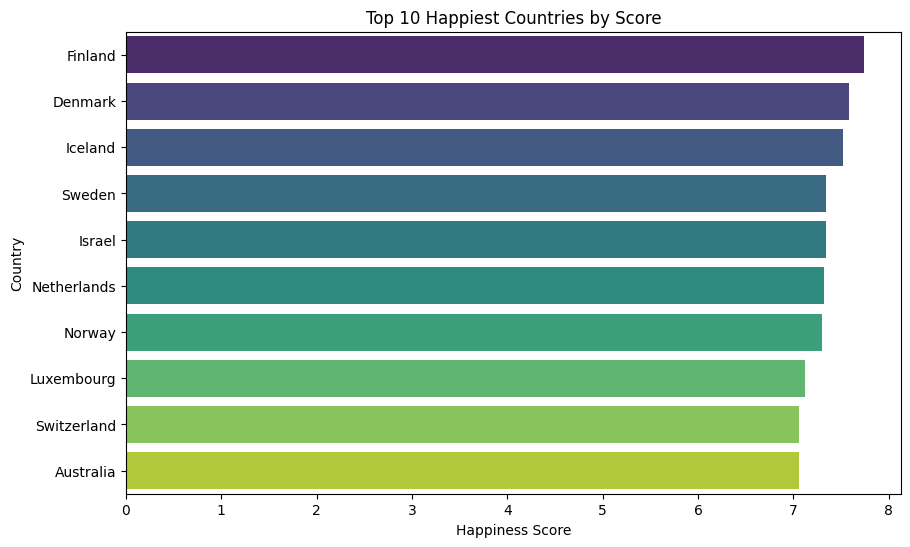

In [31]:
top_10_happiest = data.nlargest(10, "score")
plt.figure(figsize=(10, 6))
sns.barplot(x="score", y="Country name", data=top_10_happiest, palette="viridis")
plt.title("Top 10 Happiest Countries by Score")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()

 ### • Line Plot:
  Plot the top 10 unhappiest countries by Score using a Line chart.


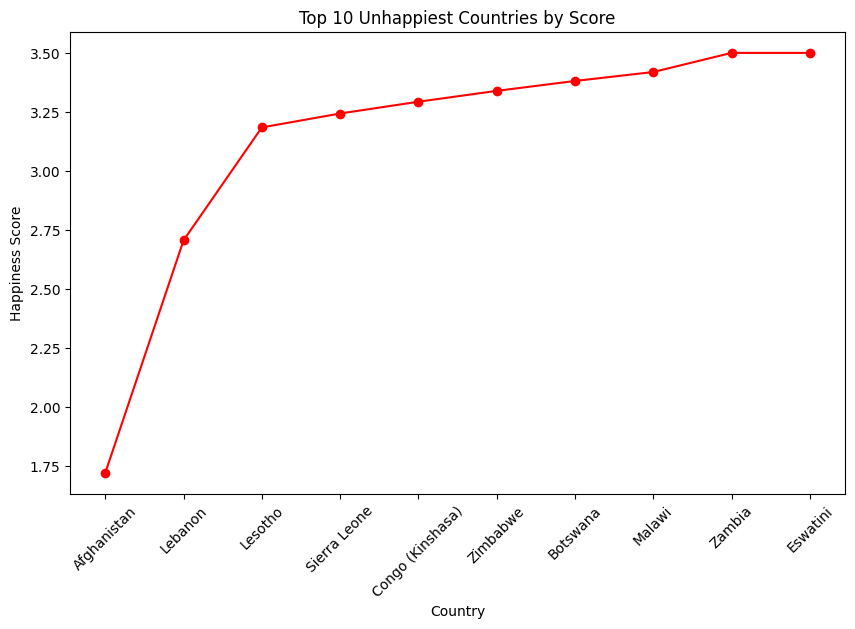

In [32]:
top_10_unhappiest = data.nsmallest(10, "score")
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest["Country name"], top_10_unhappiest["score"], marker="o", color="r")
plt.title("Top 10 Unhappiest Countries by Score")
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45)
plt.show()

### • Plot a histogram:
 Plot a histogram for the Score column to show its distribution and also interpret.

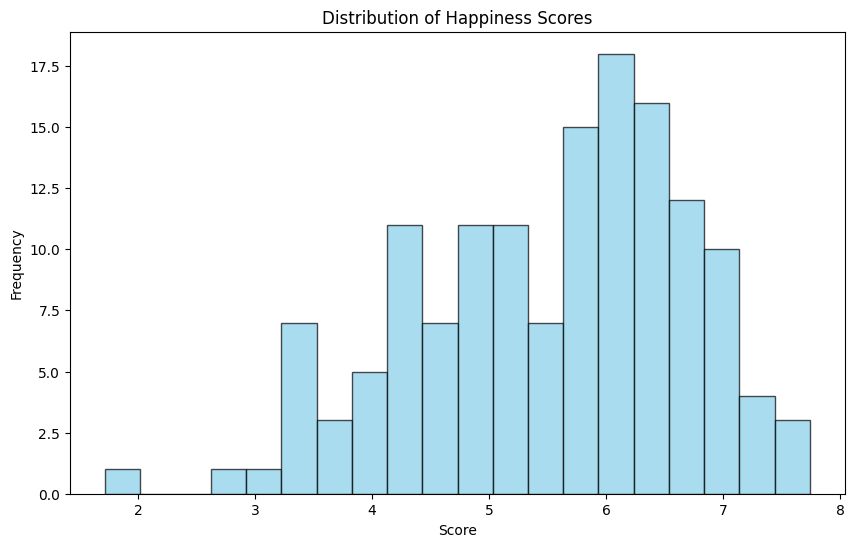

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(data["score"], bins=20, color="skyblue", alpha=0.7, edgecolor = 'black')
plt.title("Distribution of Happiness Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

### • Scatter Plot:
 Plot a scatter plot between GDP per Capita and Score to visualize their relationship

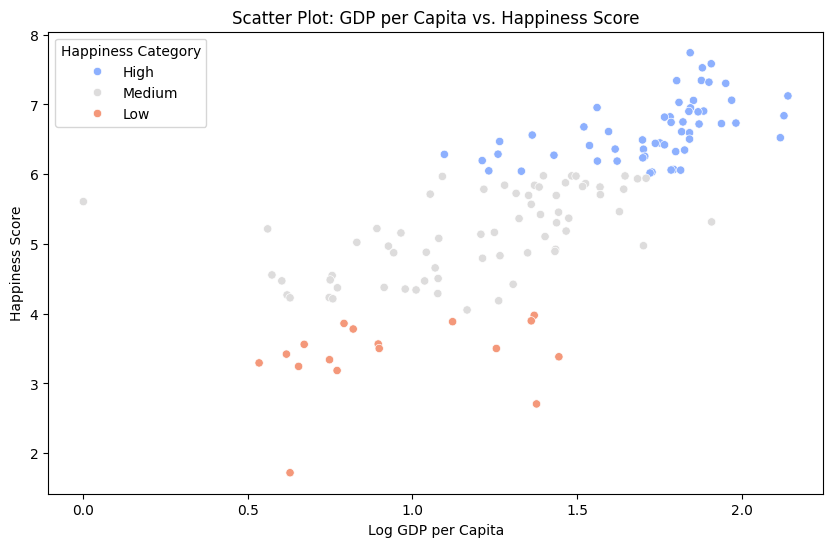

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=data, hue='Happiness Category', palette='coolwarm')
plt.title("Scatter Plot: GDP per Capita vs. Happiness Score")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.show()

 # 3.2 Problem- 2- Some Advance Data Exploration Task:
 ## Task- 1- Setup Task- Preparing the South-Asia Dataset:
 ### Steps:

 1. Define the countries in South Asia with a list for example:

 south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
 "Maldives", "Nepal", "Pakistan", "Srilanka"]

 2. Use the list from step- 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

 3. Save the filtered dataframe as separate CSV files for future use

In [35]:
# 1
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# 2
south_asia_data = data[data['Country name'].isin(south_asian_countries)]

# Display the South Asian dataset
print("\nSouth Asian Dataset:")
print(south_asia_data)

# 3
south_asia_data.to_csv("SouthAsia_Happiness.csv", index=False)
print("\nSouth Asia dataset saved as 'SouthAsia_Happiness.csv'.")


South Asian Dataset:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions 

 # Task- 2- Composite Score Ranking:
## Tasks:
 1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics:

 Composite Score = 0.40×GDP per Capita+0.30×Social Support+0.30 ×Healthy Life Expectancy



In [36]:
south_asia_data['Composite Score'] = (
    0.4 * south_asia_data['Log GDP per capita'] +
    0.3 * south_asia_data['Social support'] +
    0.3 * south_asia_data['Healthy life expectancy']
)

<ipython-input-36-d035001d421b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data['Composite Score'] = (


  2. Rank the South Asian countries based on the Composite Score in descending order.

In [37]:
south_asia_data = south_asia_data.sort_values(by='Composite Score', ascending=False)

# Display the ranked dataset
print("\nSouth Asian Countries Ranked by Composite Score:")
print(south_asia_data[['Country name', 'Composite Score', 'score']])


South Asian Countries Ranked by Composite Score:
    Country name  Composite Score  score
127    Sri Lanka           1.0739  3.898
92         Nepal           0.8159  5.158
125        India           0.7874  4.054
107     Pakistan           0.7039  4.657
128   Bangladesh           0.6774  3.886
142  Afghanistan           0.3238  1.721


 3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

<ipython-input-38-806853c579b7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Composite Score', y='Country name', data=top_5_countries, palette='viridis')


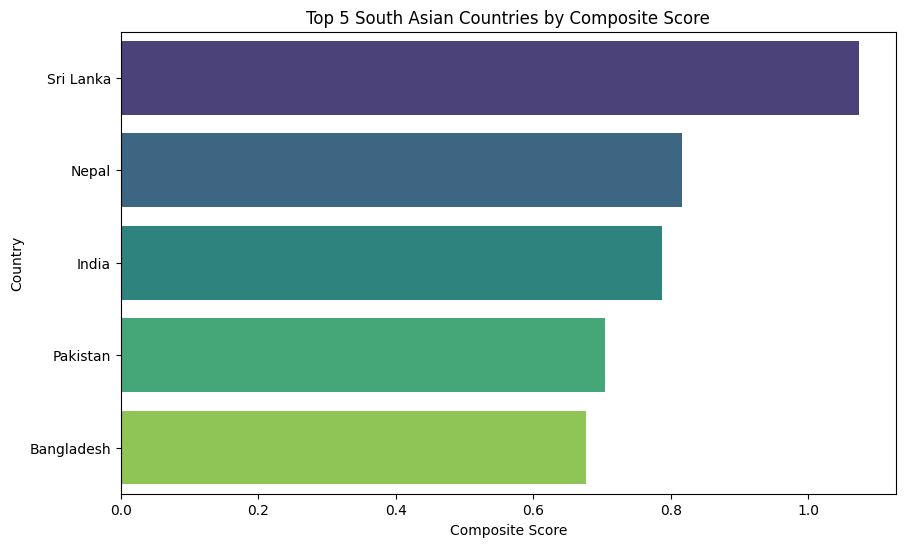

In [38]:
top_5_countries = south_asia_data.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_countries, palette='viridis')
plt.title("Top 5 South Asian Countries by Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.show()

 4. Discuss whether the rankings based on the Composite Score align with the original Score- support your
 discussion with some visualization plot.

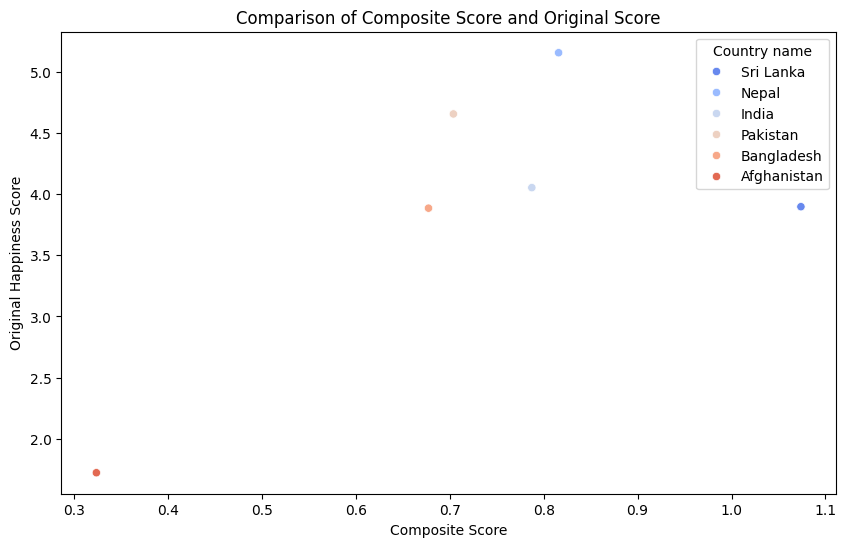

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Composite Score', y='score', data=south_asia_data, hue='Country name', palette='coolwarm')
plt.title("Comparison of Composite Score and Original Score")
plt.xlabel("Composite Score")
plt.ylabel("Original Happiness Score")
plt.show()

#  Task- 3- Outlier Detection:
 ### Tasks:
 1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

 2. Define outliers using the 1.5 × IQR rule.

 3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
 in a different color.




Outlier countries based on score:
    Country name  score
142  Afghanistan  1.721

Outlier countries based on Log GDP per capita:
    Country name  Log GDP per capita
142  Afghanistan               0.628


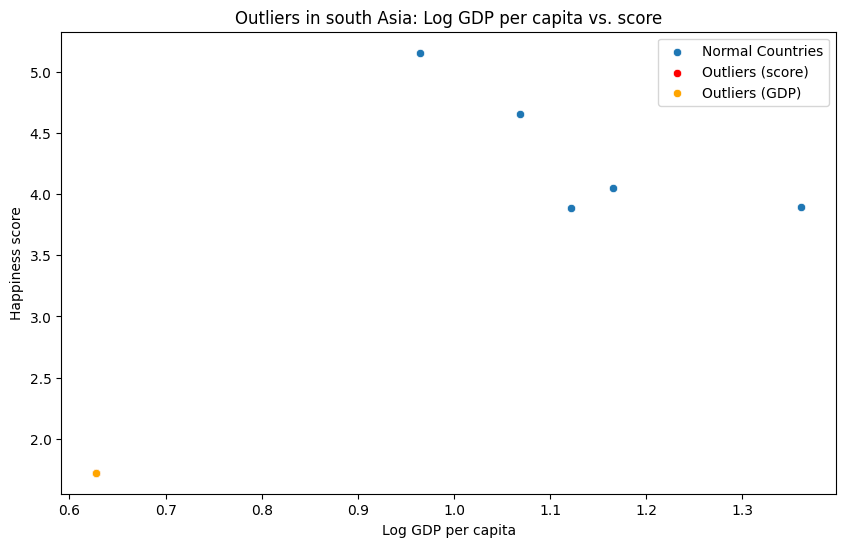

Outliers in South Asian Countries Based on Score and GDP per Capita:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


In [40]:
# Define the IQR rule function
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Identify outliers for score and Log GDP per capita
score_outliers = find_outliers(south_asia_data, 'score')
gdp_outliers = find_outliers(south_asia_data, 'Log GDP per capita')

print("\nOutlier countries based on score:")
print(score_outliers[['Country name', 'score']])

print("\nOutlier countries based on Log GDP per capita:")
print(gdp_outliers[['Country name', 'Log GDP per capita']])

# scatter plot with outliers highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, label='Normal Countries')
sns.scatterplot(x='Log GDP per capita', y='score', data=score_outliers, color='red', label='Outliers (score)')
sns.scatterplot(x='Log GDP per capita', y='score', data=gdp_outliers, color='orange', label='Outliers (GDP)')
plt.title("Outliers in south Asia: Log GDP per capita vs. score")
plt.xlabel("Log GDP per capita")
plt.ylabel("Happiness score")
plt.legend()
plt.show()

# Characteristics of Outliers
print("Outliers in South Asian Countries Based on Score and GDP per Capita:")
print(gdp_outliers[["Country name", "score", "Log GDP per capita"]])


4. Discuss the characteristics of these outliers and their potential impact on regional averages.

Characteristics of Outliers:

Negative Outliers: Countries with low happiness scores despite high GDP per Capita, indicating issues like inequality, corruption, or lack of social support.

Positive Outliers: Countries with high happiness scores despite low GDP per Capita, reflecting strong cultural values, community ties, or efficient resource use.

Impact on Regional Averages:

Skewing Means: Negative outliers lower the average happiness score, while high GDP outliers inflate economic averages.

Policy Insights: Highlight disparities and areas for improvement, such as addressing inequality or leveraging social cohesion.








 # Task- 4- Exploring Trends Across Metrics:
 ## Tasks:
 1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
 {pearson correlation} with the Score for South Asian countries.

 2. Create scatter plots with trendlines for these metrics against the Score.

 3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
 South Asian countries.



Correlations with Score:
{'Freedom to make life choices': 0.8005185224163315, 'Generosity': 0.874512371253192}


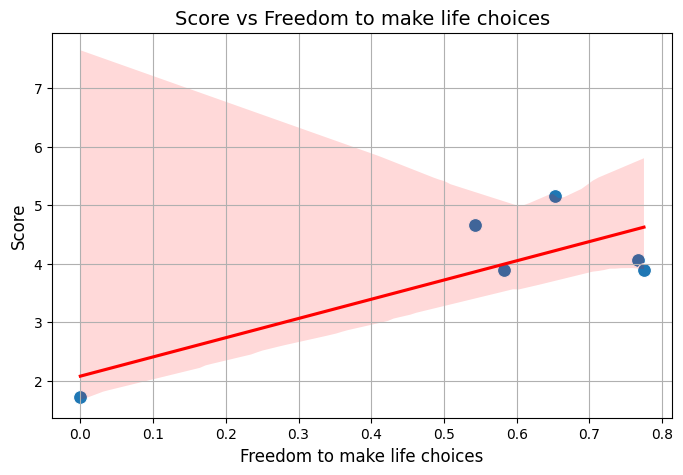

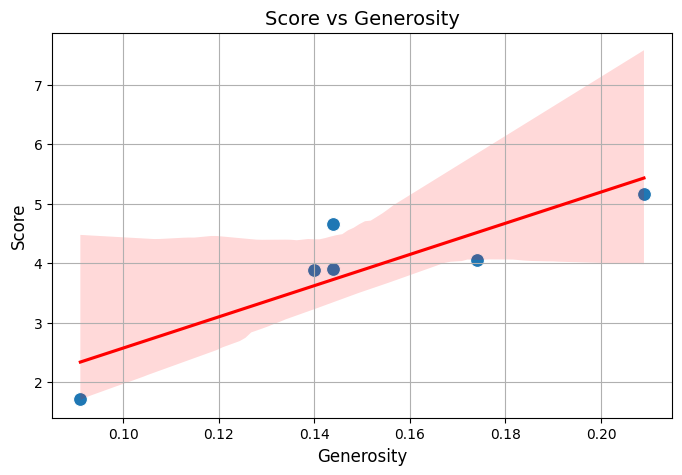


Strongest Relationship: Generosity with correlation 0.87
Weakest Relationship: Freedom to make life choices with correlation 0.80


In [41]:
# 1
metrics = ["Freedom to make life choices", "Generosity"]
correlations = {metric: south_asia_data[metric].corr(south_asia_data["score"]) for metric in metrics}
print("Correlations with Score:")
print(correlations)

# 2
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=south_asia_data, x=metric, y="score", s=100)
    sns.regplot(data=south_asia_data, x=metric, y="score", scatter=False, color="red")
    plt.title(f"Score vs {metric}", fontsize=14)
    plt.xlabel(metric, fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.grid(True)
    plt.show()

#3
strongest_metric = max(correlations, key=correlations.get)
weakest_metric = min(correlations, key=correlations.get)

print(f"\nStrongest Relationship: {strongest_metric} with correlation {correlations[strongest_metric]:.2f}")
print(f"Weakest Relationship: {weakest_metric} with correlation {correlations[weakest_metric]:.2f}")



# Task- 5- Gap Analysis:
 ## Tasks:
 1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.

 2. Rank the South Asian countries by this gap in both ascending and descending order.

 3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

 4. Analyze the reasons behind these gaps and their implications for South Asian countries

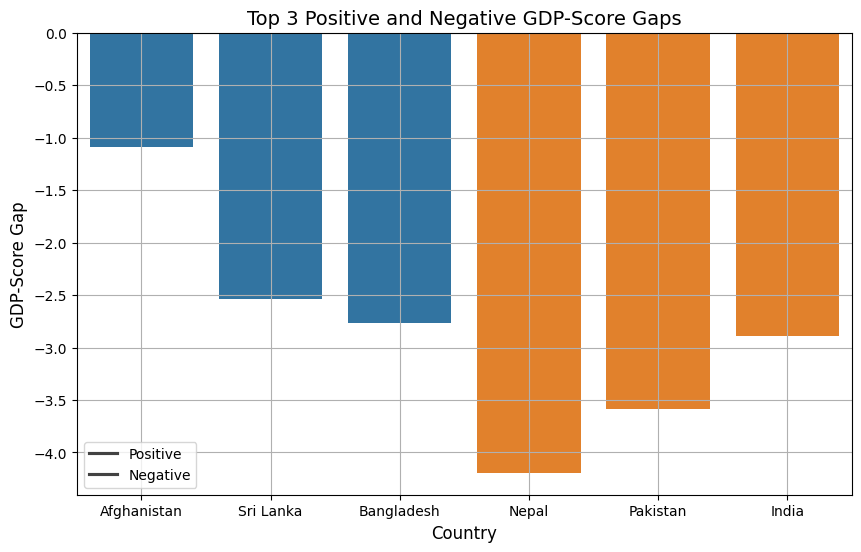

Top 3 Countries with Largest Positive Gap:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764

Top 3 Countries with Largest Negative Gap:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888


In [42]:
#1
south_asia_data["GDP-Score Gap"] = south_asia_data["Log GDP per capita"] - south_asia_data["score"]

# 2
ranked_by_gap_asc = south_asia_data.sort_values(by="GDP-Score Gap")
ranked_by_gap_desc = south_asia_data.sort_values(by="GDP-Score Gap", ascending=False)

# 3
top_3_positive = ranked_by_gap_desc.head(3)
top_3_negative = ranked_by_gap_asc.head(3)

# bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=pd.concat([top_3_positive, top_3_negative]),
            x="Country name", y="GDP-Score Gap", hue=["Positive"]*3 + ["Negative"]*3)
plt.title("Top 3 Positive and Negative GDP-Score Gaps", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("GDP-Score Gap", fontsize=12)
plt.legend(["Positive", "Negative"])
plt.grid(True)
plt.show()

# 4
print("Top 3 Countries with Largest Positive Gap:")
print(top_3_positive[["Country name", "GDP-Score Gap"]])

print("\nTop 3 Countries with Largest Negative Gap:")
print(top_3_negative[["Country name", "GDP-Score Gap"]])


# 3.3 Problem- 3- Comparative Analysis:

## Task- 1- Setup Task- Preparing the Middle Eastern Dataset:

 Tasks:
 1. Similar in Task- 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the following list:

 middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
 "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
 "United Arab Emirates", "Yemen"]

In [43]:
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine",
                         "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_east_data = data[data['Country name'].isin(middle_east_countries)]

 ## 1. Descriptive Statistics:

 • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

 • Which region has higher happiness Scores on average

In [44]:
# Calculate mean and standard deviation for South Asia
south_asia_mean = south_asia_data['score'].mean()
south_asia_std = south_asia_data['score'].std()

# Calculate mean and standard deviation for Middle East
middle_east_mean = middle_east_data['score'].mean()
middle_east_std = middle_east_data['score'].std()

print(f"South Asia - Mean: {south_asia_mean}, Standard Deviation: {south_asia_std}")
print(f"Middle East - Mean: {middle_east_mean}, Standard Deviation: {middle_east_std}")


South Asia - Mean: 3.895666666666667, Standard Deviation: 1.1770690152521501
Middle East - Mean: 5.412100000000001, Standard Deviation: 1.5662011684327144


 ## 2. Top and Bottom Performers:

 • Identify the top 3 and bottom 3 countries in each region based on the score.

 • Plot bar charts comparing these charts


Top Performers (South Asia):
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

Top Performers (Middle East):
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Bottom Performers (South Asia):
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898

Bottom Performers (Middle East):
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


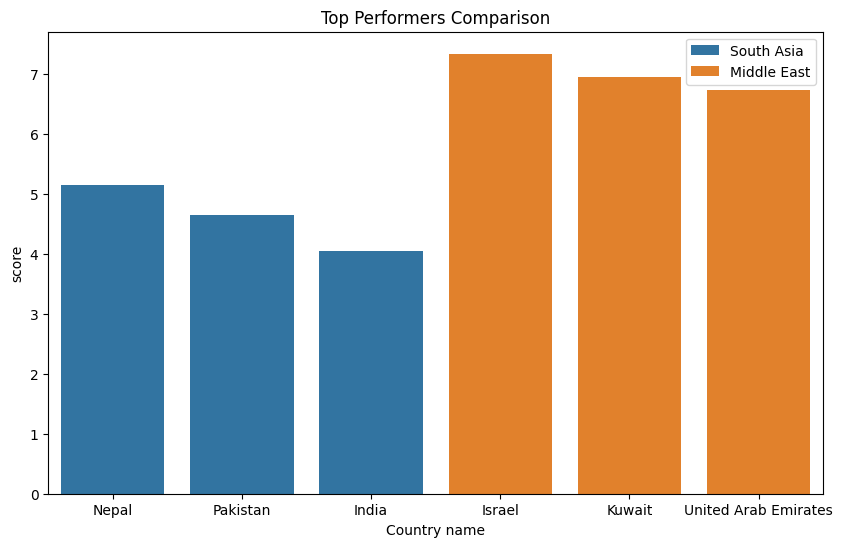

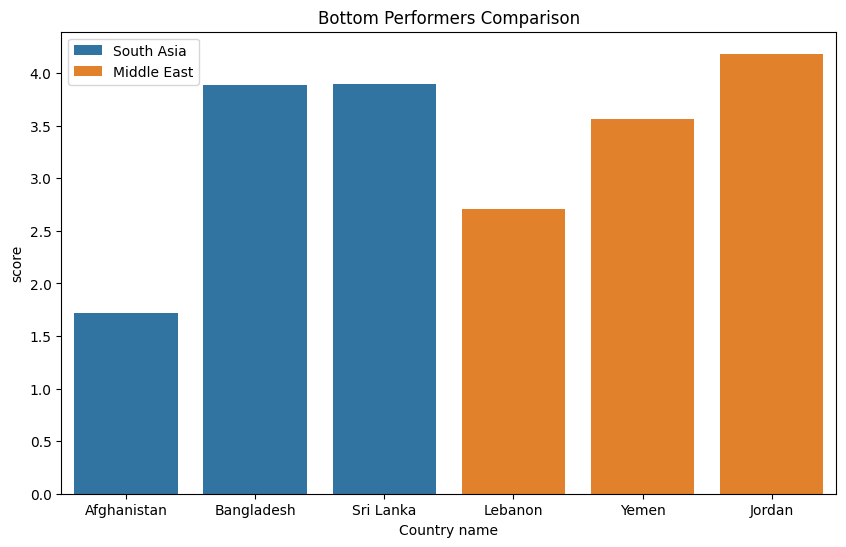

In [45]:
# Step 3: Top and Bottom Performers
top_3_south_asia = south_asia_data.nlargest(3, 'score')
bottom_3_south_asia = south_asia_data.nsmallest(3, 'score')

top_3_middle_east = middle_east_data.nlargest(3, 'score')
bottom_3_middle_east = middle_east_data.nsmallest(3, 'score')

print("\nTop Performers (South Asia):")
print(top_3_south_asia[['Country name', 'score']])

print("\nTop Performers (Middle East):")
print(top_3_middle_east[['Country name', 'score']])

print("\nBottom Performers (South Asia):")
print(bottom_3_south_asia[['Country name', 'score']])

print("\nBottom Performers (Middle East):")
print(bottom_3_middle_east[['Country name', 'score']])



# Bar Chart for Top and Bottom Performers
plt.figure(figsize=(10, 6))
sns.barplot(data=pd.concat([top_3_south_asia, top_3_middle_east]),
            x="Country name", y="score", hue=["South Asia"]*3 + ["Middle East"]*3)
plt.title("Top Performers Comparison")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=pd.concat([bottom_3_south_asia, bottom_3_middle_east]),
            x="Country name", y="score", hue=["South Asia"]*3 + ["Middle East"]*3)
plt.title("Bottom Performers Comparison")
plt.show()



## 3. Metric Comparisons:

 • Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
 between the regions using grouped bar charts.

 • Which metrics show the largest disparity between the two regions?

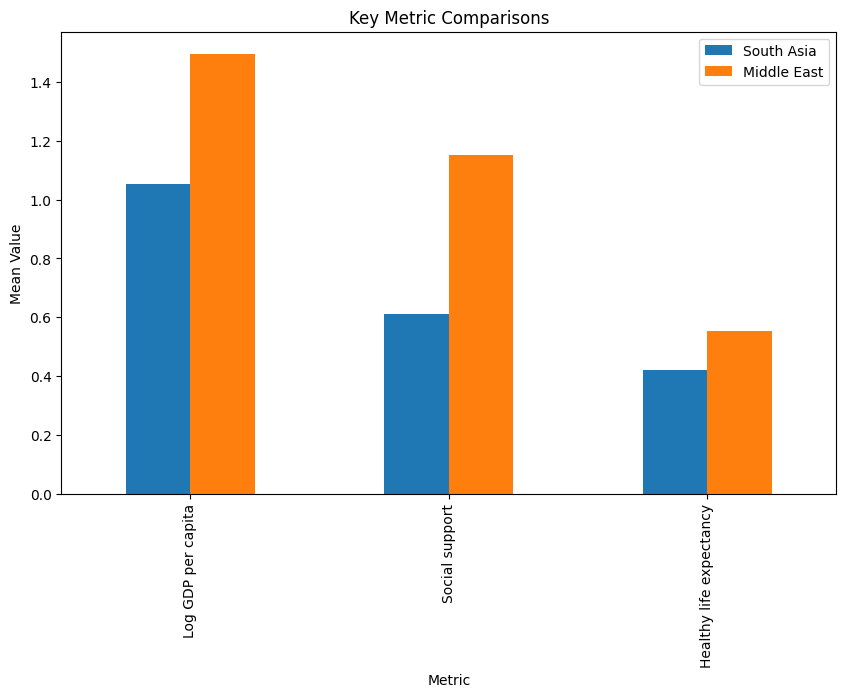

                         South Asia  Middle East  Disparity
Log GDP per capita         1.051833     1.496333   0.444500
Social support             0.611833     1.152778   0.540944
Healthy life expectancy    0.420333     0.554111   0.133778


In [46]:
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
sa_metrics_mean = south_asia_data[metrics].mean()
me_metrics_mean = middle_east_data[metrics].mean()

# Grouped Bar Chart
bar_data = pd.DataFrame({
    'South Asia': sa_metrics_mean,
    'Middle East': me_metrics_mean
}).reset_index().rename(columns={'index': 'Metric'})

bar_data.plot(x='Metric', kind='bar', figsize=(10, 6), title="Key Metric Comparisons")
plt.ylabel("Mean Value")
plt.show()

#2
# Create a DataFrame for comparison
comparison_data = pd.DataFrame({
    'South Asia': sa_metrics_mean,
    'Middle East': me_metrics_mean
})

# Calculate the disparity (difference) between the regions
comparison_data['Disparity'] = comparison_data['Middle East'] - comparison_data['South Asia']

print(comparison_data)



## 4. Happiness Disparity:

 • Compute the range (max- min) and coefficient of variation (CV) for Score in both regions.

 • Which region has greater variability in happiness

In [47]:
# Range and CV for South Asia
south_asia_range = south_asia_data['score'].max() - south_asia_data['score'].min()
south_asia_cv = south_asia_data['score'].std() / south_asia_data['score'].mean()

# Range and CV for Middle East
middle_east_range = middle_east_data['score'].max() - middle_east_data['score'].min()
middle_east_cv = middle_east_data['score'].std() / middle_east_data['score'].mean()

print(f"South Asia - Range: {south_asia_range}, Coefficient of Variation: {south_asia_cv}")
print(f"Middle East - Range: {middle_east_range}, Coefficient of Variation: {middle_east_cv}")




South Asia - Range: 3.4370000000000003, Coefficient of Variation: 0.30214828833374263
Middle East - Range: 4.634, Coefficient of Variation: 0.28938880812119405


## 5. Correlation Analysis:

 • Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
 Generosity within each region.

 • Create scatter plots to visualize and interpret the relationships.

South Asia - Correlation with Freedom to Make Life Choices: 0.8005185224163315
South Asia - Correlation with Generosity: 0.874512371253192


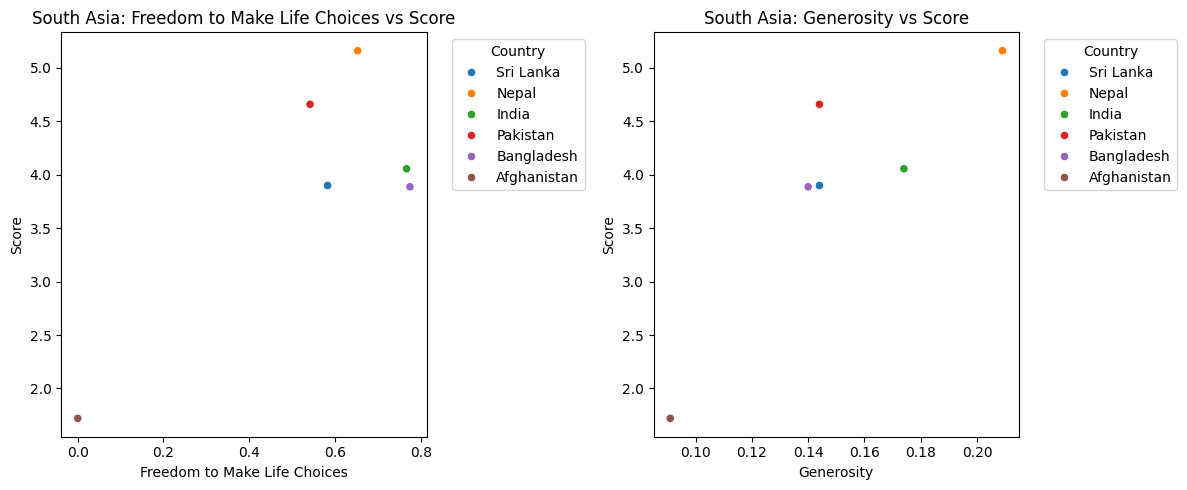

Middle East - Correlation with Freedom to Make Life Choices: 0.8632202433827544
Middle East - Correlation with Generosity: 0.6275236536964182


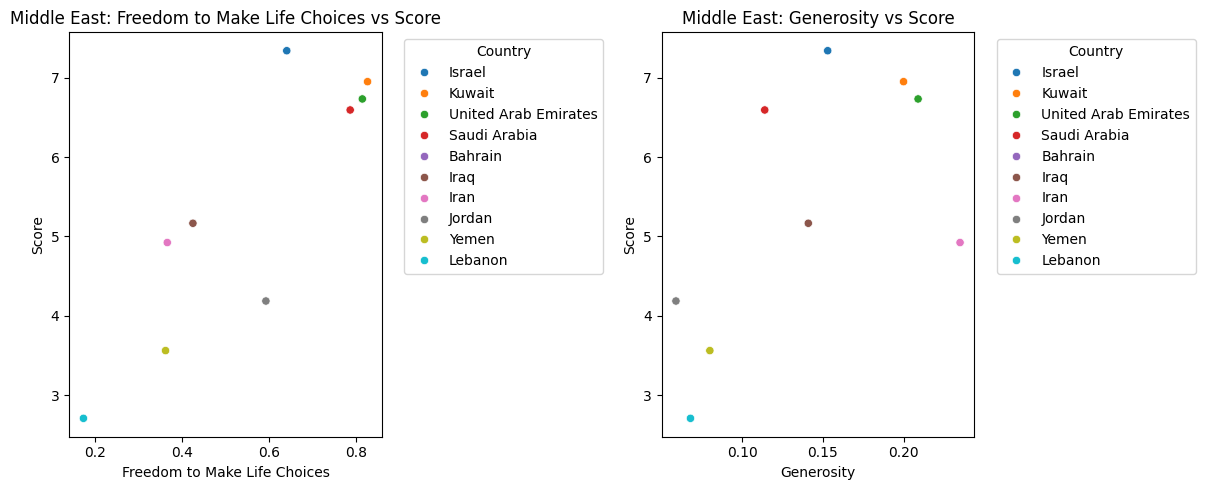

In [48]:
# Function to compute correlation and plot scatter plots with different colors for each country
def analyze_correlation_with_colors(data, region_name):
    # Compute Pearson correlation coefficients
    correlation_freedom = data['score'].corr(data['Freedom to make life choices'])
    correlation_generosity = data['score'].corr(data['Generosity'])

    # Print correlation results
    print(f"{region_name} - Correlation with Freedom to Make Life Choices: {correlation_freedom}")
    print(f"{region_name} - Correlation with Generosity: {correlation_generosity}")

    # Create scatter plots with different colors for each country
    plt.figure(figsize=(12, 5))

    # Scatter plot for Freedom to Make Life Choices vs Score
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='Freedom to make life choices', y='score', hue='Country name', data=data)
    plt.title(f'{region_name}: Freedom to Make Life Choices vs Score')
    plt.xlabel('Freedom to Make Life Choices')
    plt.ylabel('Score')
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Scatter plot for Generosity vs Score
    plt.subplot(1, 2, 2)
    sns.scatterplot(x='Generosity', y='score', hue='Country name', data=data)
    plt.title(f'{region_name}: Generosity vs Score')
    plt.xlabel('Generosity')
    plt.ylabel('Score')
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# Analyze for South Asia
analyze_correlation_with_colors(south_asia_data, 'South Asia')

# Analyze for Middle East
analyze_correlation_with_colors(middle_east_data, 'Middle East')

##  6. Outlier Detection:

 • Identify outlier countries in both regions based on Score and GDP per Capita.

 • Plot these outliers and discuss their implications.

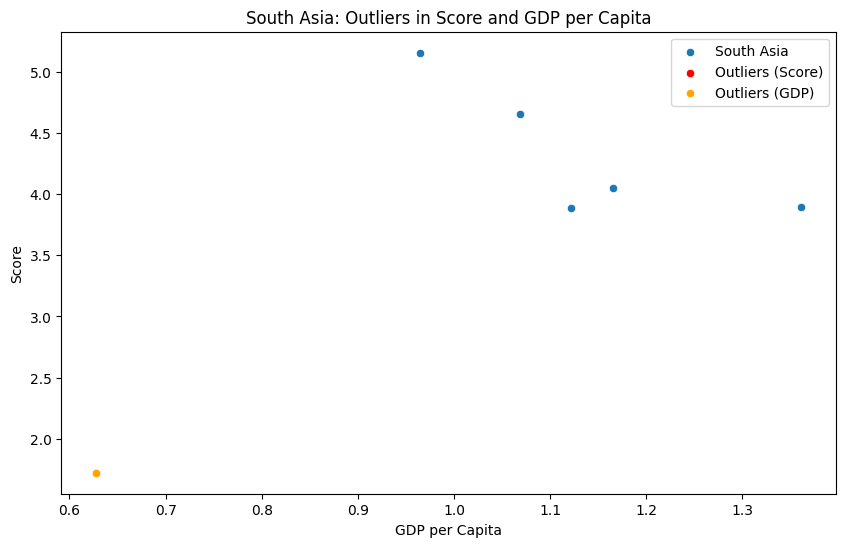

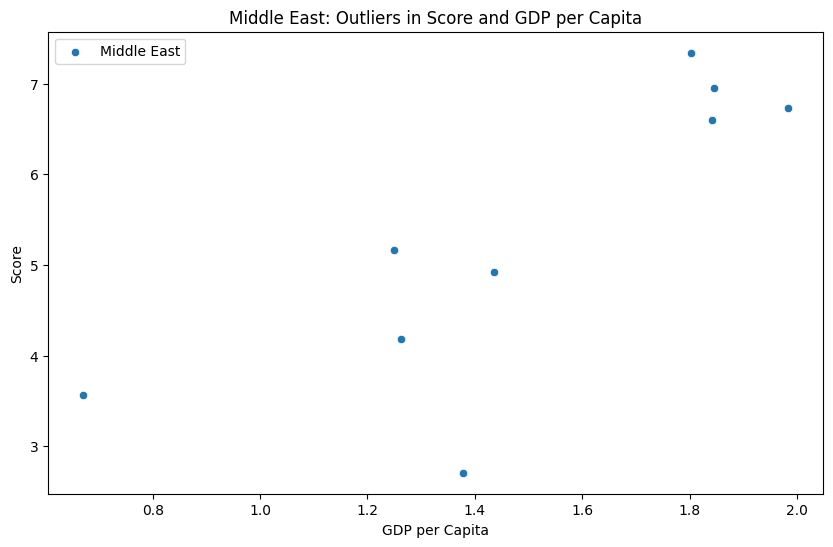

In [49]:
# Function to identify outliers using 1.5 * IQR rule
def identify_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Identify outliers for South Asia
outliers_south_asia_score = identify_outliers(south_asia_data, 'score')
outliers_south_asia_gdp = identify_outliers(south_asia_data, 'Log GDP per capita')

# Identify outliers for Middle East
outliers_middle_east_score = identify_outliers(middle_east_data, 'score')
outliers_middle_east_gdp = identify_outliers(middle_east_data, 'Log GDP per capita')

# Plot outliers for South Asia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, label='South Asia')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_south_asia_score, color='red', label='Outliers (Score)')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_south_asia_gdp, color='orange', label='Outliers (GDP)')
plt.title('South Asia: Outliers in Score and GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()

# Plot outliers for Middle East
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_data, label='Middle East')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_middle_east_score, color='red', label='Outliers (Score)')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_middle_east_gdp, color='orange', label='Outliers (GDP)')
plt.title('Middle East: Outliers in Score and GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()

##  7. Visualization:

 • Create boxplots comparing the distribution of Score between South Asia and the Middle East.

 • Interpret the key differences in distribution shapes, medians, and outliers.

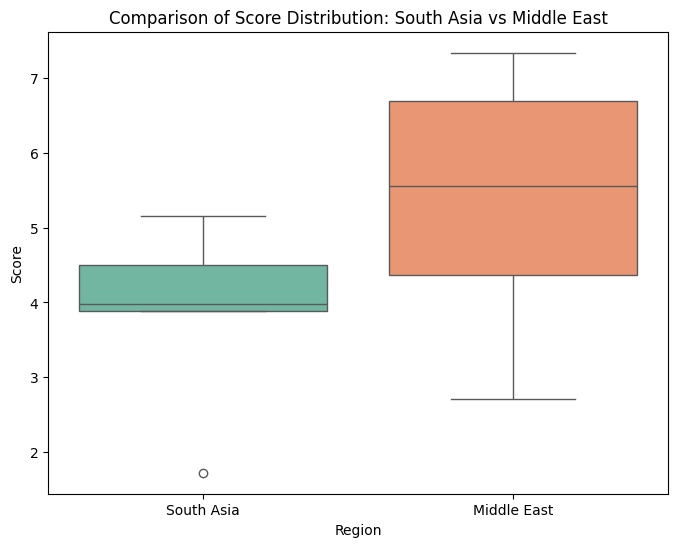

In [50]:
# Combine data for boxplot
combined_data = pd.DataFrame({
    'Region': ['South Asia'] * len(south_asia_data) + ['Middle East'] * len(middle_east_data),
    'Score': south_asia_data['score'].tolist() + middle_east_data['score'].tolist()
})

# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='Score', data=combined_data, hue='Region', palette='Set2', legend=False)
plt.title('Comparison of Score Distribution: South Asia vs Middle East')
plt.xlabel('Region')
plt.ylabel('Score')
plt.show()